# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Компьютерное зрение & генеративные модели


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Баллы за задание:**

* Задача 1 &mdash; 150 баллов
* Задача 2 &mdash; 40 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
!pip install torchinfo

In [3]:
import time
import warnings
from collections import defaultdict
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchinfo import summary

from IPython.display import clear_output
sns.set(font_scale=1, style='darkgrid', palette='Set2')
warnings.simplefilter("ignore")

device = f"cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture5_1.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/CV_classification.html" target="_blank">ноутбук</a> про сверточные сети и классификацию, а так же <a href="https://miptstats.github.io/courses/ad_fivt/lecture5_2.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/CV_complex_examples.html" target="_blank">ноутбук</a> про перенос стиля и генеративные сети.

---
### Задача 1. Классификация MNIST


Цель: сравнить сверточные нейросети с разными параметрами на датасете рукописных цифр MNIST. В нем содержатся черно-белые изображения цифр, всего 10 классов для каждой цифры. Пользоваться кодом семинара можно без ограничений. Классификация MNIST намного легче, чем CIFAR, поэтому ваша задача хотя бы в одной из моделей получить 98% точности **на валидации**.

> Использования слоев с семинара (свертка, pooling) более чем достаточно для достижения 98% точности на тесте. Также не делайте сеть глубокой.

> Тестируйте работоспособность кода на CPU с небольшим кол-вом итераций. Если все работает, и хочется ускорить процесс, переходите на GPU.

Следуйте указаниям ниже.

Загрузим датаcет из `torchvision.datasets`.

In [4]:
# Данные для обучения
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           download=True,
                                           transform=transforms.ToTensor())
# Данные для тестирования
val_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                         download=True,
                                         transform=transforms.ToTensor())
# Классы объектов в датасете
classes = [str(i) for i in range(10)]

100%|██████████| 9912422/9912422 [00:00<00:00, 60523148.70it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 67787181.77it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23226161.06it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12126370.95it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Визуализируйте несколько картинок с соответствующими метками из датасета.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torchinfo import summary
import torchinfo


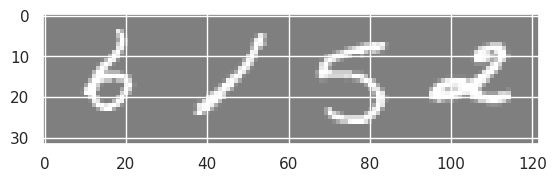

6 1 5 2


In [6]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(DataLoader(train_dataset, batch_size=4, shuffle=True))
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(" ".join(f"{classes[labels[j]]}" for j in range(4)))

Создайте генераторы батчей.

In [7]:
batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


**Эксперимент 1.** Создайте хотя бы 5 сверточных нейросетей с разным количеством линейных и сверточных слоев. Должен присутствовать хотя бы 1 сверточный слой и хотя бы 1 линейный слой. Для каждой посмотрите количество параметров с помощью `torchinfo.summary`.

In [45]:
model1 = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16 * 14 * 14, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)
summary(model1, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 16, 28, 28]         160
├─ReLU: 1-2                              [128, 16, 28, 28]         --
├─MaxPool2d: 1-3                         [128, 16, 14, 14]         --
├─Flatten: 1-4                           [128, 3136]               --
├─Linear: 1-5                            [128, 256]                803,072
├─ReLU: 1-6                              [128, 256]                --
├─Linear: 1-7                            [128, 10]                 2,570
Total params: 805,802
Trainable params: 805,802
Non-trainable params: 0
Total mult-adds (M): 119.18
Input size (MB): 0.40
Forward/backward pass size (MB): 13.12
Params size (MB): 3.22
Estimated Total Size (MB): 16.74

In [46]:
model2 = nn.Sequential(
    nn.Conv2d(1, 32, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(32 * 13 * 13, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
summary(model2, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 32, 26, 26]         320
├─ReLU: 1-2                              [128, 32, 26, 26]         --
├─MaxPool2d: 1-3                         [128, 32, 13, 13]         --
├─Flatten: 1-4                           [128, 5408]               --
├─Linear: 1-5                            [128, 128]                692,352
├─ReLU: 1-6                              [128, 128]                --
├─Linear: 1-7                            [128, 10]                 1,290
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
Total mult-adds (M): 116.48
Input size (MB): 0.40
Forward/backward pass size (MB): 22.29
Params size (MB): 2.78
Estimated Total Size (MB): 25.47

In [47]:
model3 = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1),
    nn.ReLU(),
    nn.Conv2d(16, 32, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(32 * 12 * 12, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
summary(model3, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 16, 26, 26]         160
├─ReLU: 1-2                              [128, 16, 26, 26]         --
├─Conv2d: 1-3                            [128, 32, 24, 24]         4,640
├─ReLU: 1-4                              [128, 32, 24, 24]         --
├─MaxPool2d: 1-5                         [128, 32, 12, 12]         --
├─Flatten: 1-6                           [128, 4608]               --
├─Linear: 1-7                            [128, 128]                589,952
├─ReLU: 1-8                              [128, 128]                --
├─Linear: 1-9                            [128, 10]                 1,290
Total params: 596,042
Trainable params: 596,042
Non-trainable params: 0
Total mult-adds (M): 431.62
Input size (MB): 0.40
Forward/backward pass size (MB): 30.09
Params size (MB): 2.38
Estimated Total Size (MB): 32

In [48]:
model4 = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 32, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(32 * 5 * 5, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
summary(model4, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 16, 26, 26]         160
├─ReLU: 1-2                              [128, 16, 26, 26]         --
├─MaxPool2d: 1-3                         [128, 16, 13, 13]         --
├─Conv2d: 1-4                            [128, 32, 11, 11]         4,640
├─ReLU: 1-5                              [128, 32, 11, 11]         --
├─MaxPool2d: 1-6                         [128, 32, 5, 5]           --
├─Flatten: 1-7                           [128, 800]                --
├─Linear: 1-8                            [128, 128]                102,528
├─ReLU: 1-9                              [128, 128]                --
├─Linear: 1-10                           [128, 10]                 1,290
Total params: 108,618
Trainable params: 108,618
Non-trainable params: 0
Total mult-adds (M): 99.00
Input size (MB): 0.40
Forward/backward pass 

In [49]:
model5 = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(16 * 14 * 14, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
summary(model5, input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [128, 10]                 --
├─Conv2d: 1-1                            [128, 16, 28, 28]         160
├─ReLU: 1-2                              [128, 16, 28, 28]         --
├─MaxPool2d: 1-3                         [128, 16, 14, 14]         --
├─Flatten: 1-4                           [128, 3136]               --
├─Linear: 1-5                            [128, 128]                401,536
├─ReLU: 1-6                              [128, 128]                --
├─Linear: 1-7                            [128, 10]                 1,290
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
Total mult-adds (M): 67.62
Input size (MB): 0.40
Forward/backward pass size (MB): 12.99
Params size (MB): 1.61
Estimated Total Size (MB): 15.00

Обучите сети, используя функцию потерь `nn.CrossEntropyLoss` и оптимизатор `torch.optim.Adam` с дефолтными параметрами.

In [12]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    train_losses = []
    val_losses = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct_train / total_train
        train_losses.append(train_loss)
        train_accuracy.append(train_acc)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracy.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}, "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    return train_losses, val_losses, train_accuracy, val_accuracy



criterion = nn.CrossEntropyLoss()


In [ ]:
optimizer1 = optim.Adam(model1.parameters())
optimizer2 = optim.Adam(model2.parameters())
optimizer3 = optim.Adam(model3.parameters())
optimizer4 = optim.Adam(model4.parameters())
optimizer5 = optim.Adam(model5.parameters())


train_losses1, val_losses1, train_accuracy1, val_accuracy1 = train_model(model1, train_loader, val_loader, criterion, optimizer1, num_epochs=5)
train_losses2, val_losses2, train_accuracy2, val_accuracy2 = train_model(model2, train_loader, val_loader, criterion, optimizer2, num_epochs=5)
train_losses3, val_losses3, train_accuracy3, val_accuracy3 = train_model(model3, train_loader, val_loader, criterion, optimizer3, num_epochs=5)
train_losses4, val_losses4, train_accuracy4, val_accuracy4 = train_model(model4, train_loader, val_loader, criterion, optimizer4, num_epochs=5)
train_losses5, val_losses5, train_accuracy5, val_accuracy5 = train_model(model5, train_loader, val_loader, criterion, optimizer5, num_epochs=5)

Epoch 1/5, Train Loss: 0.2579, Train Acc: 0.9284, Val Loss: 0.1095, Val Acc: 0.9668
Epoch 2/5, Train Loss: 0.0802, Train Acc: 0.9760, Val Loss: 0.0626, Val Acc: 0.9799
Epoch 3/5, Train Loss: 0.0530, Train Acc: 0.9841, Val Loss: 0.0527, Val Acc: 0.9818
Epoch 4/5, Train Loss: 0.0403, Train Acc: 0.9876, Val Loss: 0.0536, Val Acc: 0.9842
Epoch 5/5, Train Loss: 0.0313, Train Acc: 0.9904, Val Loss: 0.0445, Val Acc: 0.9849
Epoch 1/5, Train Loss: 0.2920, Train Acc: 0.9166, Val Loss: 0.1057, Val Acc: 0.9698
Epoch 2/5, Train Loss: 0.0913, Train Acc: 0.9725, Val Loss: 0.0656, Val Acc: 0.9789
Epoch 3/5, Train Loss: 0.0599, Train Acc: 0.9823, Val Loss: 0.0577, Val Acc: 0.9812
Epoch 4/5, Train Loss: 0.0449, Train Acc: 0.9871, Val Loss: 0.0528, Val Acc: 0.9817
Epoch 5/5, Train Loss: 0.0350, Train Acc: 0.9898, Val Loss: 0.0405, Val Acc: 0.9859
Epoch 1/5, Train Loss: 0.2284, Train Acc: 0.9337, Val Loss: 0.0586, Val Acc: 0.9816
Epoch 2/5, Train Loss: 0.0595, Train Acc: 0.9820, Val Loss: 0.0517, Val Acc:

Постройте график лосса и график accuracy, где сравниваются все модели (на train и на val). Нужная функция есть в семинаре.

In [20]:
def plot_results(train_losses, val_losses, train_accuracy, val_accuracy):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

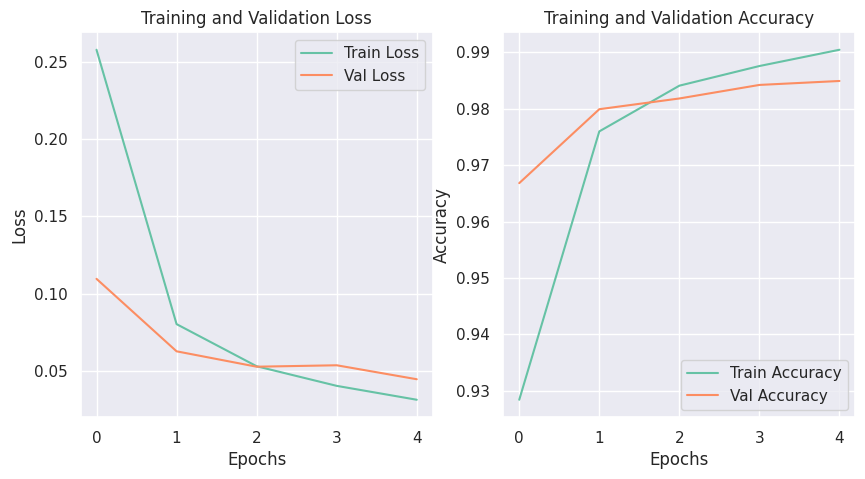

In [ ]:
plot_results(train_losses1, val_losses1, train_accuracy1, val_accuracy1)

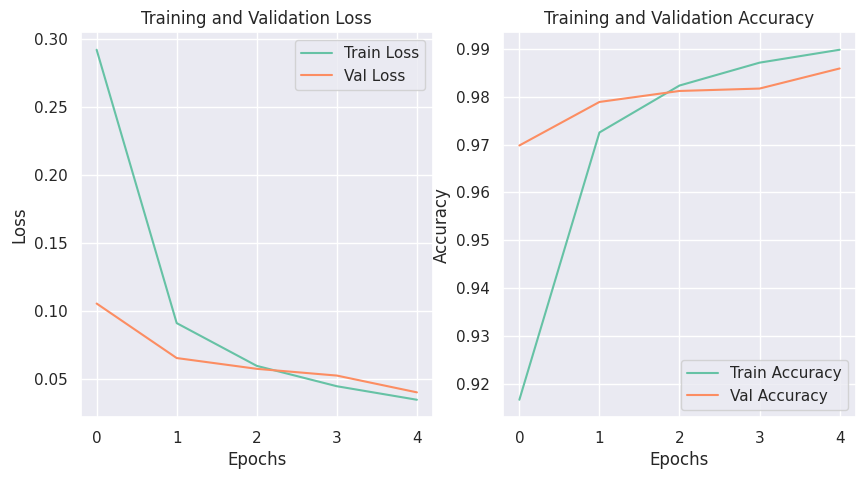

In [ ]:
plot_results(train_losses2, val_losses2, train_accuracy2, val_accuracy2)

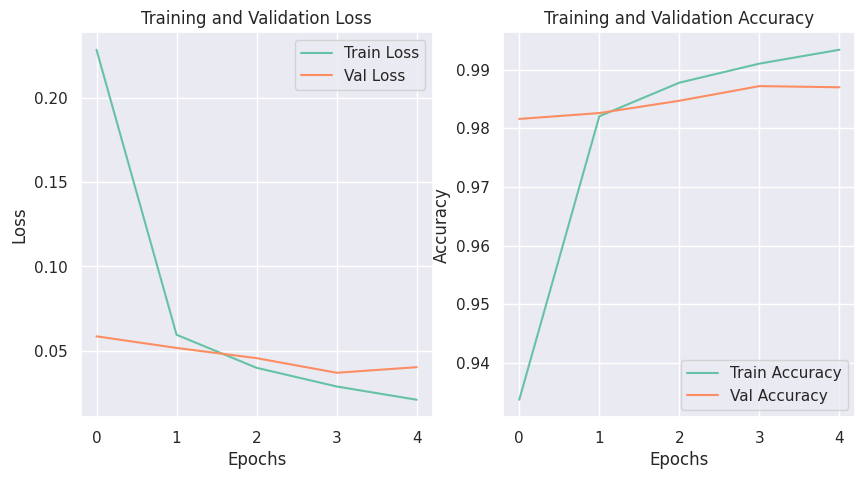

In [ ]:
plot_results(train_losses3, val_losses3, train_accuracy3, val_accuracy3)

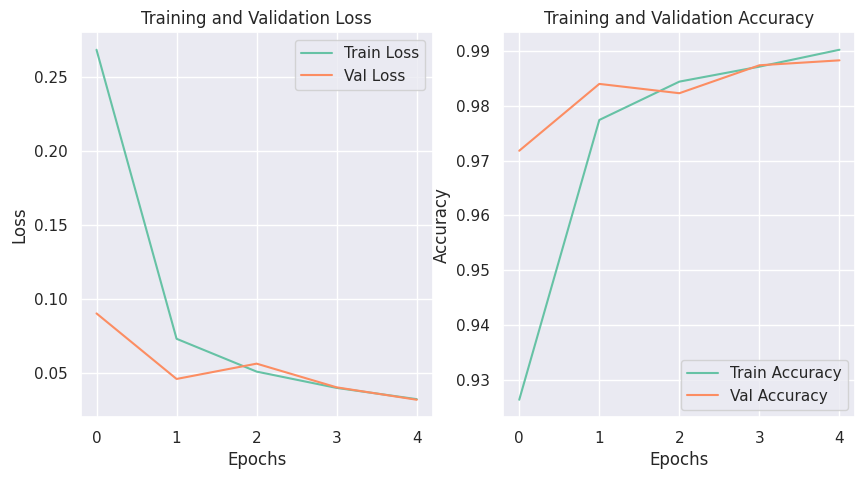

In [ ]:
plot_results(train_losses4, val_losses4, train_accuracy4, val_accuracy4)

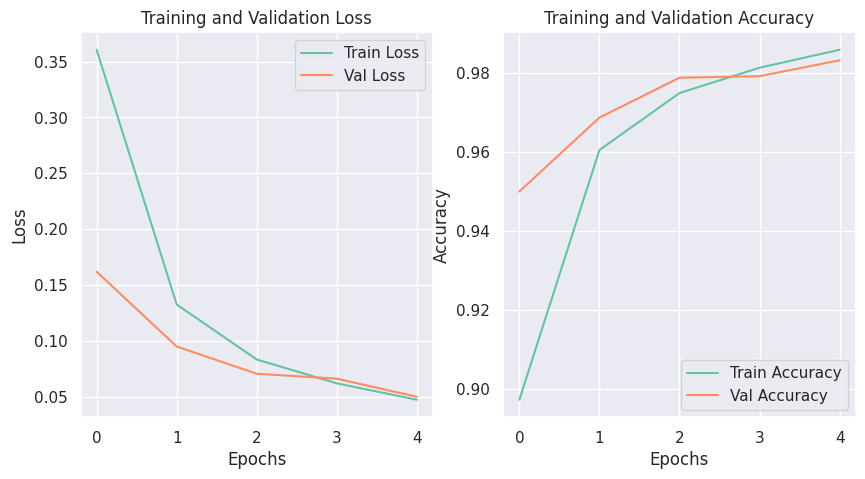

In [ ]:
plot_results(train_losses5, val_losses5, train_accuracy5, val_accuracy5)

Сделайте вывод. Как количество разных слоев влияет на качество и время обучения?

**Вывод по эксперименту 1:** Можно заметить, то что модели с большим количеством слоев спустя время показывают лучшие результаты на тренировачных данных, но в то же время на тестовых они не сильно лучше. Скорее всего более сложные модели требуют более долгого обучения и возможно их просто намного сложнее обучить. Много слоев не всегда дают хорошие результаты

**Эксперимент 2.** Теперь выберите лучший вариант, зафиксируйте это количество сверточных и линейных слоев и обучите хотя бы 4 сверточных нейросети, варьируя размеры ядер сверток. Например, в разном порядке поставьте ядра 3x3, 5x5.

In [13]:
model5_1 = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 5, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [14]:
model5_2 = nn.Sequential(
    nn.Conv2d(1, 16, 5, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 3, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [25]:
model5_3 = nn.Sequential(
    nn.Conv2d(1, 16, 3, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 7, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(32 * 6 * 6, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [36]:
model5_4 = nn.Sequential(
    nn.Conv2d(1, 16, 7, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 3, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [17]:
optimizer5_1 = optim.Adam(model5_1.parameters())
optimizer5_2 = optim.Adam(model5_2.parameters())
optimizer5_3 = optim.Adam(model5_3.parameters())
optimizer5_4 = optim.Adam(model5_4.parameters())

train_losses5_1, val_losses5_1, train_accuracy5_1, val_accuracy5_1 = train_model(model5_1, train_loader, val_loader, criterion, optimizer5_1, num_epochs=5)
train_losses5_2, val_losses5_2, train_accuracy5_2, val_accuracy5_2 = train_model(model5_2, train_loader, val_loader, criterion, optimizer5_2, num_epochs=5)
train_losses5_3, val_losses5_3, train_accuracy5_3, val_accuracy5_3 = train_model(model5_3, train_loader, val_loader, criterion, optimizer5_3, num_epochs=5)
train_losses5_4, val_losses5_4, train_accuracy5_4, val_accuracy5_4 = train_model(model5_4, train_loader, val_loader, criterion, optimizer5_4, num_epochs=5)





Epoch 1/5, Train Loss: 0.2668, Train Acc: 0.9216, Val Loss: 0.0617, Val Acc: 0.9809
Epoch 2/5, Train Loss: 0.0630, Train Acc: 0.9808, Val Loss: 0.0462, Val Acc: 0.9842
Epoch 3/5, Train Loss: 0.0446, Train Acc: 0.9865, Val Loss: 0.0391, Val Acc: 0.9862
Epoch 4/5, Train Loss: 0.0335, Train Acc: 0.9901, Val Loss: 0.0370, Val Acc: 0.9877
Epoch 5/5, Train Loss: 0.0266, Train Acc: 0.9918, Val Loss: 0.0325, Val Acc: 0.9897
Epoch 1/5, Train Loss: 0.2745, Train Acc: 0.9228, Val Loss: 0.0871, Val Acc: 0.9741
Epoch 2/5, Train Loss: 0.0716, Train Acc: 0.9781, Val Loss: 0.0477, Val Acc: 0.9845
Epoch 3/5, Train Loss: 0.0497, Train Acc: 0.9848, Val Loss: 0.0358, Val Acc: 0.9872
Epoch 4/5, Train Loss: 0.0393, Train Acc: 0.9879, Val Loss: 0.0353, Val Acc: 0.9883
Epoch 5/5, Train Loss: 0.0337, Train Acc: 0.9897, Val Loss: 0.0305, Val Acc: 0.9898
Epoch 1/5, Train Loss: 0.2740, Train Acc: 0.9168, Val Loss: 0.0703, Val Acc: 0.9796
Epoch 2/5, Train Loss: 0.0634, Train Acc: 0.9806, Val Loss: 0.0445, Val Acc:

Постройте график лосса и график accuracy, где сравниваются все модели этого эксперимента (на train и на val).

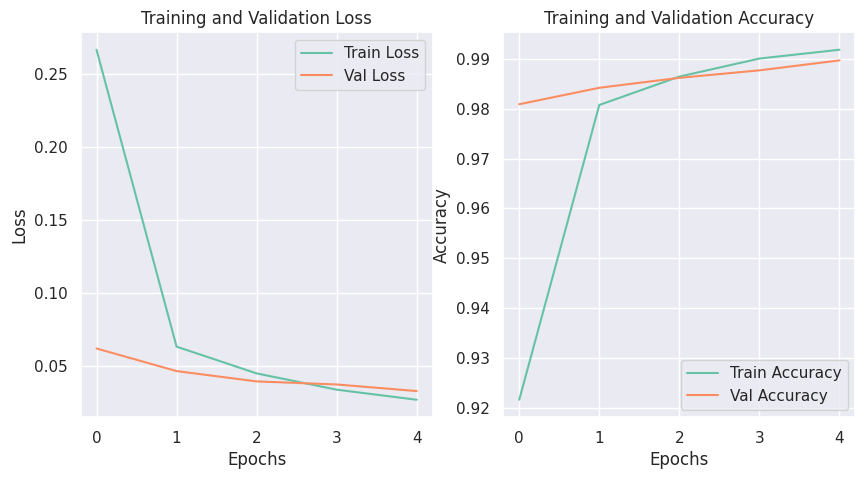

In [21]:
plot_results(train_losses5_1, val_losses5_1, train_accuracy5_1, val_accuracy5_1)

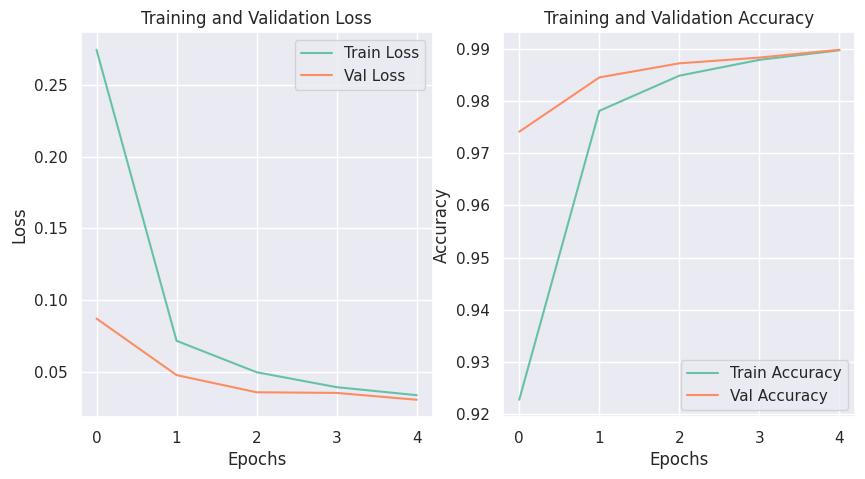

In [22]:
plot_results(train_losses5_2, val_losses5_2, train_accuracy5_2, val_accuracy5_2)

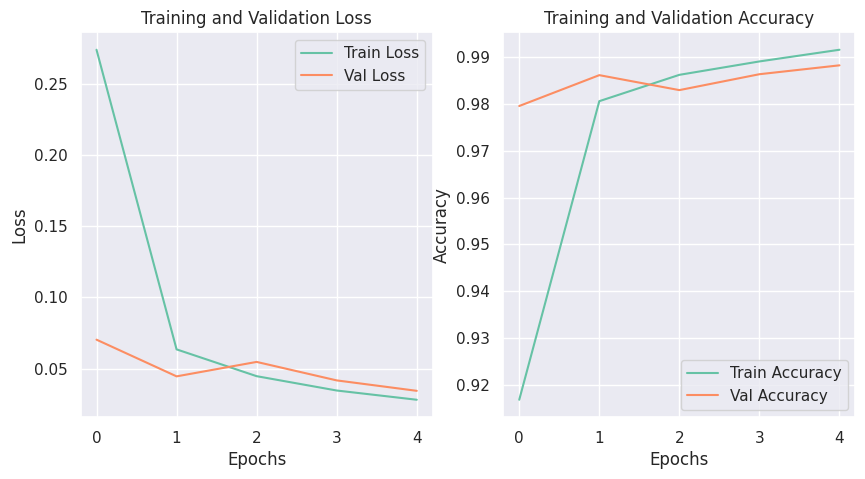

In [23]:
plot_results(train_losses5_3, val_losses5_3, train_accuracy5_3, val_accuracy5_3)

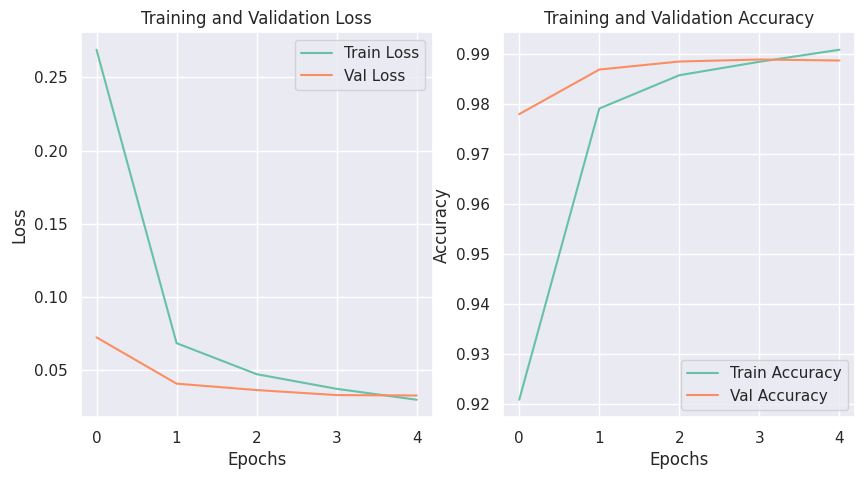

In [24]:
plot_results(train_losses5_4, val_losses5_4, train_accuracy5_4, val_accuracy5_4)

Сделайте вывод. Как размеры ядер влияют на качество и время обучения?

**Вывод по эксперименту 2:** Можно заметить, что, чем больше количество ядер, тем дольше процесс обучения из-за большого количества параметров. Точность также немного увеличивается с повышением количества ядер.

**Анализ лучшей модели.** Выберите лучшую конфигурацию из всех по accuracy на валидации. Она должна быть не меньше 98%.

In [44]:
model5_2= nn.Sequential(
    nn.Conv2d(1, 16, 7, 1, 1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(16, 32, 3, 1, 2),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(),
    nn.Linear(32 * 7 * 7, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

train_accuracy5_2[4], val_accuracy5_2[4]


(0.9897, 0.9898)

Проведите еще один проход валидации выбранной моделью по всему датасету. В нем посчитайте точность по каждому классу и соберите информацию о неправильных предсказаниях. Равномерна ли точность по отношению к классам? Покажите 10-20 примеров, на которых нейросеть выдала неправильную метку. Что можно о них сказать?

In [43]:
def validate_model(model, data_loader):
    model.eval()
    correct_preds = {i: 0 for i in range(10)}
    total_preds = {i: 0 for i in range(10)}
    wrong_preds = []

    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for i in range(len(predicted)):
                if predicted[i] == labels[i]:
                    correct_preds[labels[i].item()] += 1
                else:
                    wrong_preds.append((images[i], predicted[i], labels[i]))
                total_preds[labels[i].item()] += 1

    print("Точность по классам:")
    for i in range(10):
        accuracy = correct_preds[i] / total_preds[i] if total_preds[i] > 0 else 0
        print(f"Класс {i}: {accuracy * 100:.2f}%")

    print("\nНеправильные предсказания:")
    for i, (image, predicted, label) in enumerate(wrong_preds[:20], 1):
        print(f"Пример {i}: Предсказано {predicted}, Ожидается {label}")


validate_model(model5_2, val_loader)

Точность по классам:
Класс 0: 99.39%
Класс 1: 99.91%
Класс 2: 98.64%
Класс 3: 99.11%
Класс 4: 99.49%
Класс 5: 99.10%
Класс 6: 98.64%
Класс 7: 98.74%
Класс 8: 98.77%
Класс 9: 97.92%

Неправильные предсказания:
Пример 1: Предсказано 8, Ожидается 3
Пример 2: Предсказано 4, Ожидается 9
Пример 3: Предсказано 7, Ожидается 2
Пример 4: Предсказано 2, Ожидается 8
Пример 5: Предсказано 7, Ожидается 2
Пример 6: Предсказано 4, Ожидается 6
Пример 7: Предсказано 4, Ожидается 2
Пример 8: Предсказано 1, Ожидается 2
Пример 9: Предсказано 9, Ожидается 4
Пример 10: Предсказано 7, Ожидается 2
Пример 11: Предсказано 9, Ожидается 8
Пример 12: Предсказано 1, Ожидается 8
Пример 13: Предсказано 1, Ожидается 7
Пример 14: Предсказано 6, Ожидается 4
Пример 15: Предсказано 8, Ожидается 3
Пример 16: Предсказано 1, Ожидается 6
Пример 17: Предсказано 8, Ожидается 6
Пример 18: Предсказано 4, Ожидается 2
Пример 19: Предсказано 2, Ожидается 7
Пример 20: Предсказано 4, Ожидается 9


Можно заметить, что модель неплохо справилась со своей задачей на всех классах и ее точность не менее 97%. В местах, где она ошиблась можно заметить сходства самих циыр, так что результат вполне неплох

**Вывод по всей задаче:** В данной задаче мы попробовали проанализировать разные сверточные модели, посмотрели зависимость точности и количества слоев с ядрами. Можно заметить, что с увеличением и того, и того время обучения во много раз увеличивается, но и зачастую результат становится лучше. Путем сужения выборки моделей и экспериментов с самыми лучшими, мы получили достаточно хорошую точность на тестовых данных.


---
### Задача 2. Перенос стиля

Здесь вы потренируетесь в работе с картинками и составлением промптов. Используя код с <a href="https://miptstats.github.io/courses/ad_fivt/CV_complex_examples.html" target="_blank">семинара</a>, проведите перенос стиля на хотя бы 3 своих примерах.

> Заметьте, что в примерах с семинара в качестве картинок стиля и контента использовались картинки среднего разрешения. Если возникают проблемы: оптимизация останавливается на 0-й эпохе и не создает картинку; loss в какой-то момент стал nan; нехватка RAM; &mdash; то либо уменьшите разрешение ваших картинок, либо попробуйте картинку полегче.

In [ ]:
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

sns.set(palette="Set2")

In [ ]:
!git clone https://github.com/nazianafis/Neural-Style-Transfer
# Перейдем в директорию скачанного репозитория
%cd /content/Neural-Style-Transfer/

# Небольшая обработка скрипта, не менять!
file_path = "NST.py"
with open(file_path, "r") as file:
    # Убираем автоматический запуск
    lines = file.readlines()[:183]
# Вывод логов только каждые 100 эпох
lines = lines[:175] + ["            if cnt % 100 == 0:\n"] + lines[175:]
lines[176] = "    " + lines[176]
with open(file_path, "w") as file:
    file.writelines(lines)

from NST import *



Cloning into 'Neural-Style-Transfer'...
remote: Enumerating objects: 379, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 379 (delta 72), reused 105 (delta 34), pack-reused 225
Receiving objects: 100% (379/379), 92.21 MiB | 32.74 MiB/s, done.
Resolving deltas: 100% (143/143), done.
/content/Neural-Style-Transfer


In [ ]:


def run_neural_style_transfer(content_image="c1.jpg", style_image="s1.jpg"):
    """
    Функция для запуска метода Neural Style Transfer.

    :param content_image: имя файла картинки контента
    :param style_image: имя файла картинки стиля
    :return: results_path -- путь к папке, в которую сохранился результат
    """
    PATH = ""
    default_resource_dir = os.path.join(PATH, "data")
    content_images_dir = os.path.join(default_resource_dir, "content-images")
    style_images_dir = os.path.join(default_resource_dir, "style-images")
    output_img_dir = os.path.join(default_resource_dir, "output-images")
    img_format = (4, ".jpg")

    # Задаем конфиги, включая вес компонент лосса
    optimization_config = {
        "content_img_name": content_image,
        "style_img_name": style_image,
        "height": 400,
        "content_weight": 100000.0,
        "style_weight": 30000.0,
        "tv_weight": 1.0,
    }
    optimization_config["content_images_dir"] = content_images_dir
    optimization_config["style_images_dir"] = style_images_dir
    optimization_config["output_img_dir"] = output_img_dir
    optimization_config["img_format"] = img_format

    results_path = neural_style_transfer(optimization_config)
    return results_path



In [ ]:


def visualize_style_transfer(content_image, style_image, results_path):
    """
    Визуализация результатов.

    :param content_image: имя файла картинки контента
    :param style_image: имя файла картинки стиля
    :param results_path: путь к папке, в которую сохранился результат
    """
    if len(os.listdir(results_path)) == 0:
        return
    plt.figure(figsize=(13, 3))
    folders = [
        "content-images/",
        "output-images/" + Path(results_path).name + "/",
        "style-images/",
    ]
    combined_image = (
        Path(content_image).stem + "_" + Path(style_image).stem + ".jpg"
    )
    files = [content_image, combined_image, style_image]
    titles = ["Контент", "Результат", "Стиль"]
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(plt.imread("data/" + folders[i] + files[i]))
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])



In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:

content_path = "/content/drive/MyDrive/content"
style_path = "/content/drive/MyDrive/style"

!rm -r data/content-images
!mkdir data/content-images
!cp -a /$content_path/. data/content-images/

!rm -r data/style-images
!mkdir data/style-images
!cp -a /$style_path/. data/style-images/



In [ ]:
content_images = sorted(os.listdir("data/content-images"))
style_images = sorted(os.listdir("data/style-images"))
result_paths = []
for content_image, style_image in zip(content_images, style_images):
    results_path = run_neural_style_transfer(content_image, style_image)
    result_paths.append(results_path)



Using VGG19 in the optimization procedure.
L-BFGS | iteration: 000, total loss=1130656956416.0000, content_loss=      0.0000, style loss=1130649960000.0000, tv loss=6979906.0000
L-BFGS | iteration: 100, total loss=6265435648.0000, content_loss=1883210546.8750, style loss=4359237656.2500, tv loss=22987368.0000
L-BFGS | iteration: 200, total loss=4320440832.0000, content_loss=1819197460.9375, style loss=2476962421.8750, tv loss=24281320.0000
L-BFGS | iteration: 300, total loss=3749046784.0000, content_loss=1771020507.8125, style loss=1953006445.3125, tv loss=25019816.0000
L-BFGS | iteration: 400, total loss=3471653888.0000, content_loss=1734970117.1875, style loss=1711160976.5625, tv loss=25522812.0000
L-BFGS | iteration: 500, total loss=3308019456.0000, content_loss=1712154101.5625, style loss=1569994570.3125, tv loss=25870508.0000
L-BFGS | iteration: 600, total loss=3199522560.0000, content_loss=1695562109.3750, style loss=1477835625.0000, tv loss=26124696.0000
L-BFGS | iteration: 700,

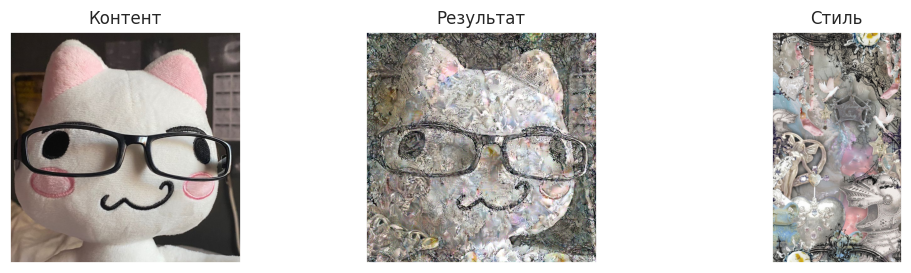

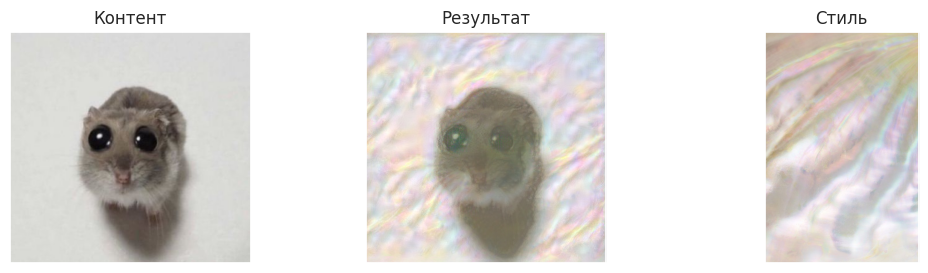

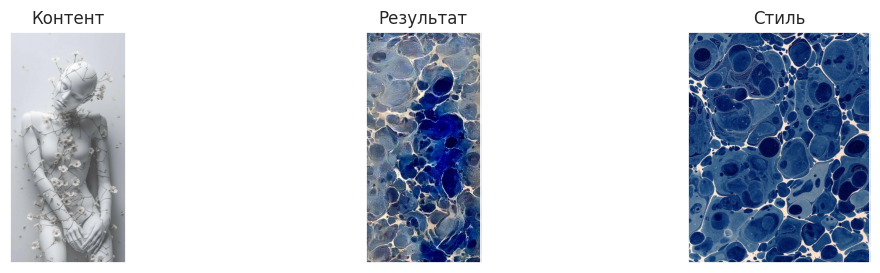

In [ ]:
!cp -r data/output-images /content/drive/MyDrive/DS

for content_image, style_image, results_path in zip(
    content_images, style_images, result_paths
):
    visualize_style_transfer(content_image, style_image, results_path)

Теперь для каждой пары контекст-стиль попытайтесь сгенерировать картинку с таким контекстом и стилем с помощью диффузионной модели, рассмотренной на семинаре, задав нужный промпт.

In [ ]:
!pip install -q diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 7.9 MB/s eta 0:00:00


In [ ]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16"
).to("cuda")


/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  wa

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

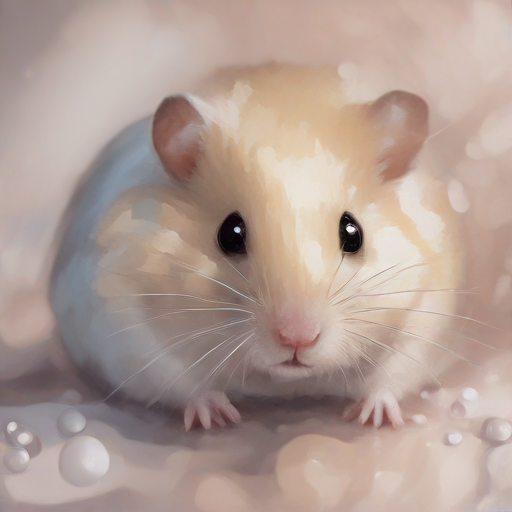

In [ ]:
prompt = "sad hamster with a pearlescent texture applied to it"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image



  0%|          | 0/1 [00:00<?, ?it/s]

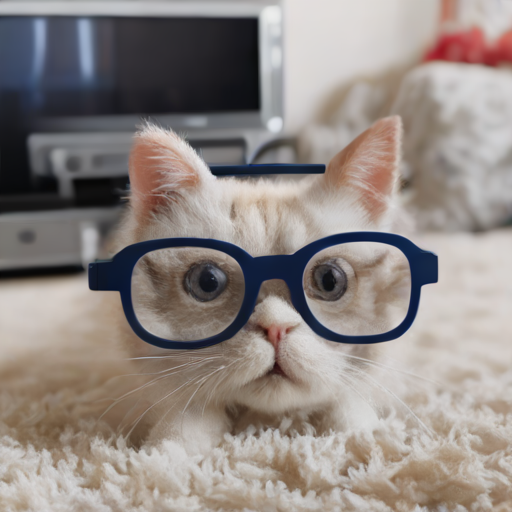

In [ ]:
prompt = "cat toy with glasses on it in the style of looking like static on a TV"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

  0%|          | 0/1 [00:00<?, ?it/s]

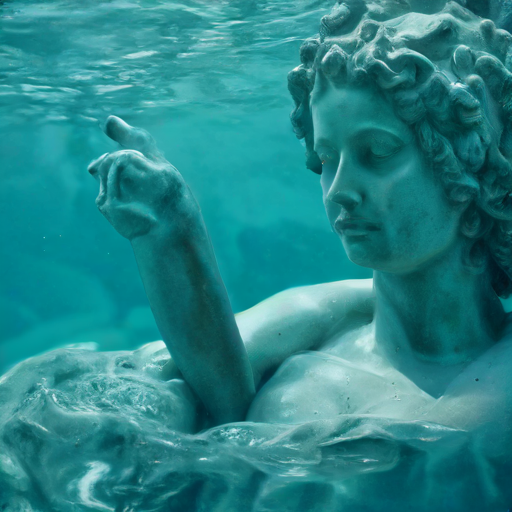

In [ ]:
prompt = "statue of a woman under bright blue water all in blue tones"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
image

**Вывод:**
мы попробовали использовать уже готовые нейронные сети для создания уникальных изображений без профессионального образования в данной сфере. Как можно было заметить, они отлично справляются с данной работой, что может быть и печально. Не знаю какой еще вывод тут можно сделать ибо мы просто украли чью-то нейронку ;p

